In [83]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [84]:
ha = pd.read_csv('healthcare-dataset-stroke-data.csv') 
ha = ha.head(1000)
ha

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60211,Male,1.40,0,0,No,children,Urban,90.51,18.9,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
997,61715,Male,55.00,0,0,Yes,Private,Rural,56.42,31.8,never smoked,0
998,37830,Female,29.00,0,0,No,Private,Urban,73.67,21.0,Unknown,0


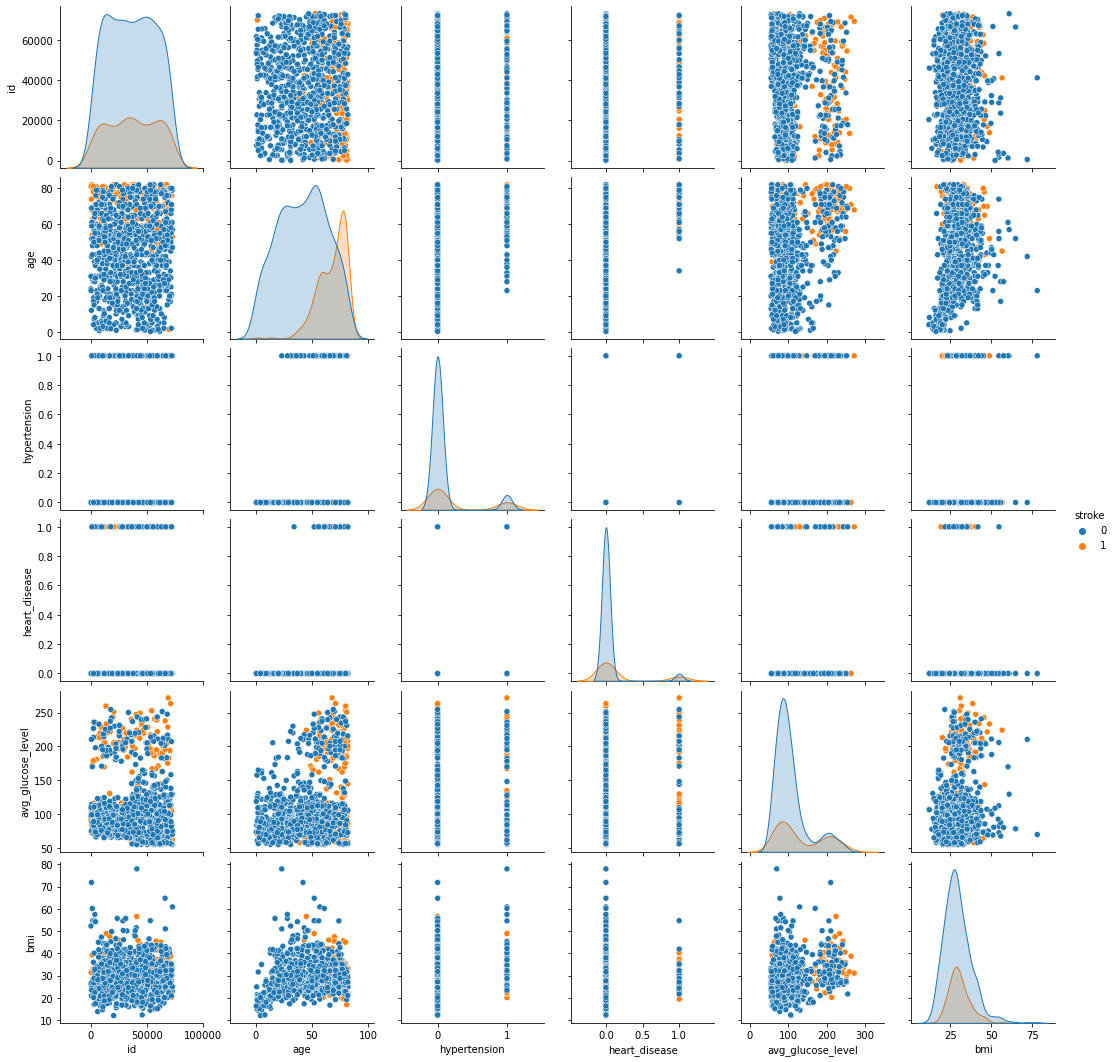

In [85]:
sns.pairplot(data=ha, hue = 'stroke')

In [86]:
count = (ha['stroke'] == 0).sum()
print(count)

751


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60211,Male,1.40,0,0,No,children,Urban,90.51,18.9,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
997,61715,Male,55.00,0,0,Yes,Private,Rural,56.42,31.8,never smoked,0
998,37830,Female,29.00,0,0,No,Private,Urban,73.67,21.0,Unknown,0


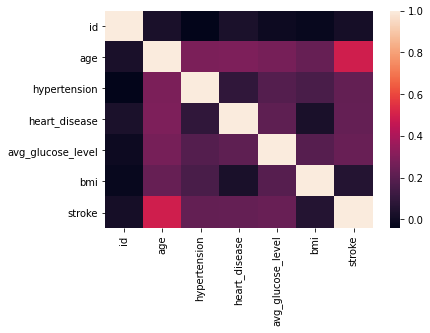

In [87]:
sns.heatmap(ha.corr())
ha

In [88]:
le = preprocessing.LabelEncoder()
ha1 = ha[['gender', 'ever_married','work_type','Residence_type','smoking_status']].apply(le.fit_transform)
ha['gender'] = ha1['gender'].values

In [89]:
ha['ever_married'] = ha1['ever_married'].values

In [90]:
ha['work_type'] = ha1['work_type'].values

In [91]:
ha['Residence_type'] = ha1['Residence_type'].values

In [92]:
ha['smoking_status'] = ha1['smoking_status'].values

In [93]:
ha=ha.drop(['bmi'], axis = 1)
ha

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,1,67.00,0,1,1,2,1,228.69,1,1
1,51676,0,61.00,0,0,1,3,0,202.21,2,1
2,31112,1,80.00,0,1,1,2,0,105.92,2,1
3,60182,0,49.00,0,0,1,2,1,171.23,3,1
4,1665,0,79.00,1,0,1,3,0,174.12,2,1
...,...,...,...,...,...,...,...,...,...,...,...
995,60211,1,1.40,0,0,0,4,1,90.51,0,0
996,53279,1,0.24,0,0,0,4,0,118.87,0,0
997,61715,1,55.00,0,0,1,2,0,56.42,2,0
998,37830,0,29.00,0,0,0,2,1,73.67,0,0


In [99]:
target = ha['stroke']
ha1 = ha.copy()
ha1 = ha1.drop('stroke', axis =1)

In [100]:
X = ha1

In [101]:
y = target

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (800, 10)
Testing split input-  (200, 10)


In [103]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [104]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       156
           1       0.44      0.64      0.52        44

    accuracy                           0.74       200
   macro avg       0.66      0.70      0.67       200
weighted avg       0.78      0.74      0.76       200



Text(0.5, 1.0, 'Accuracy Score: 0.74')

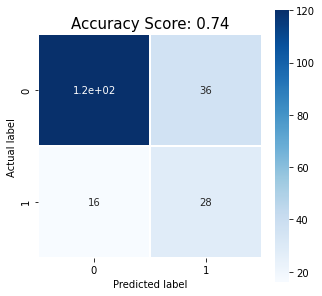

In [105]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

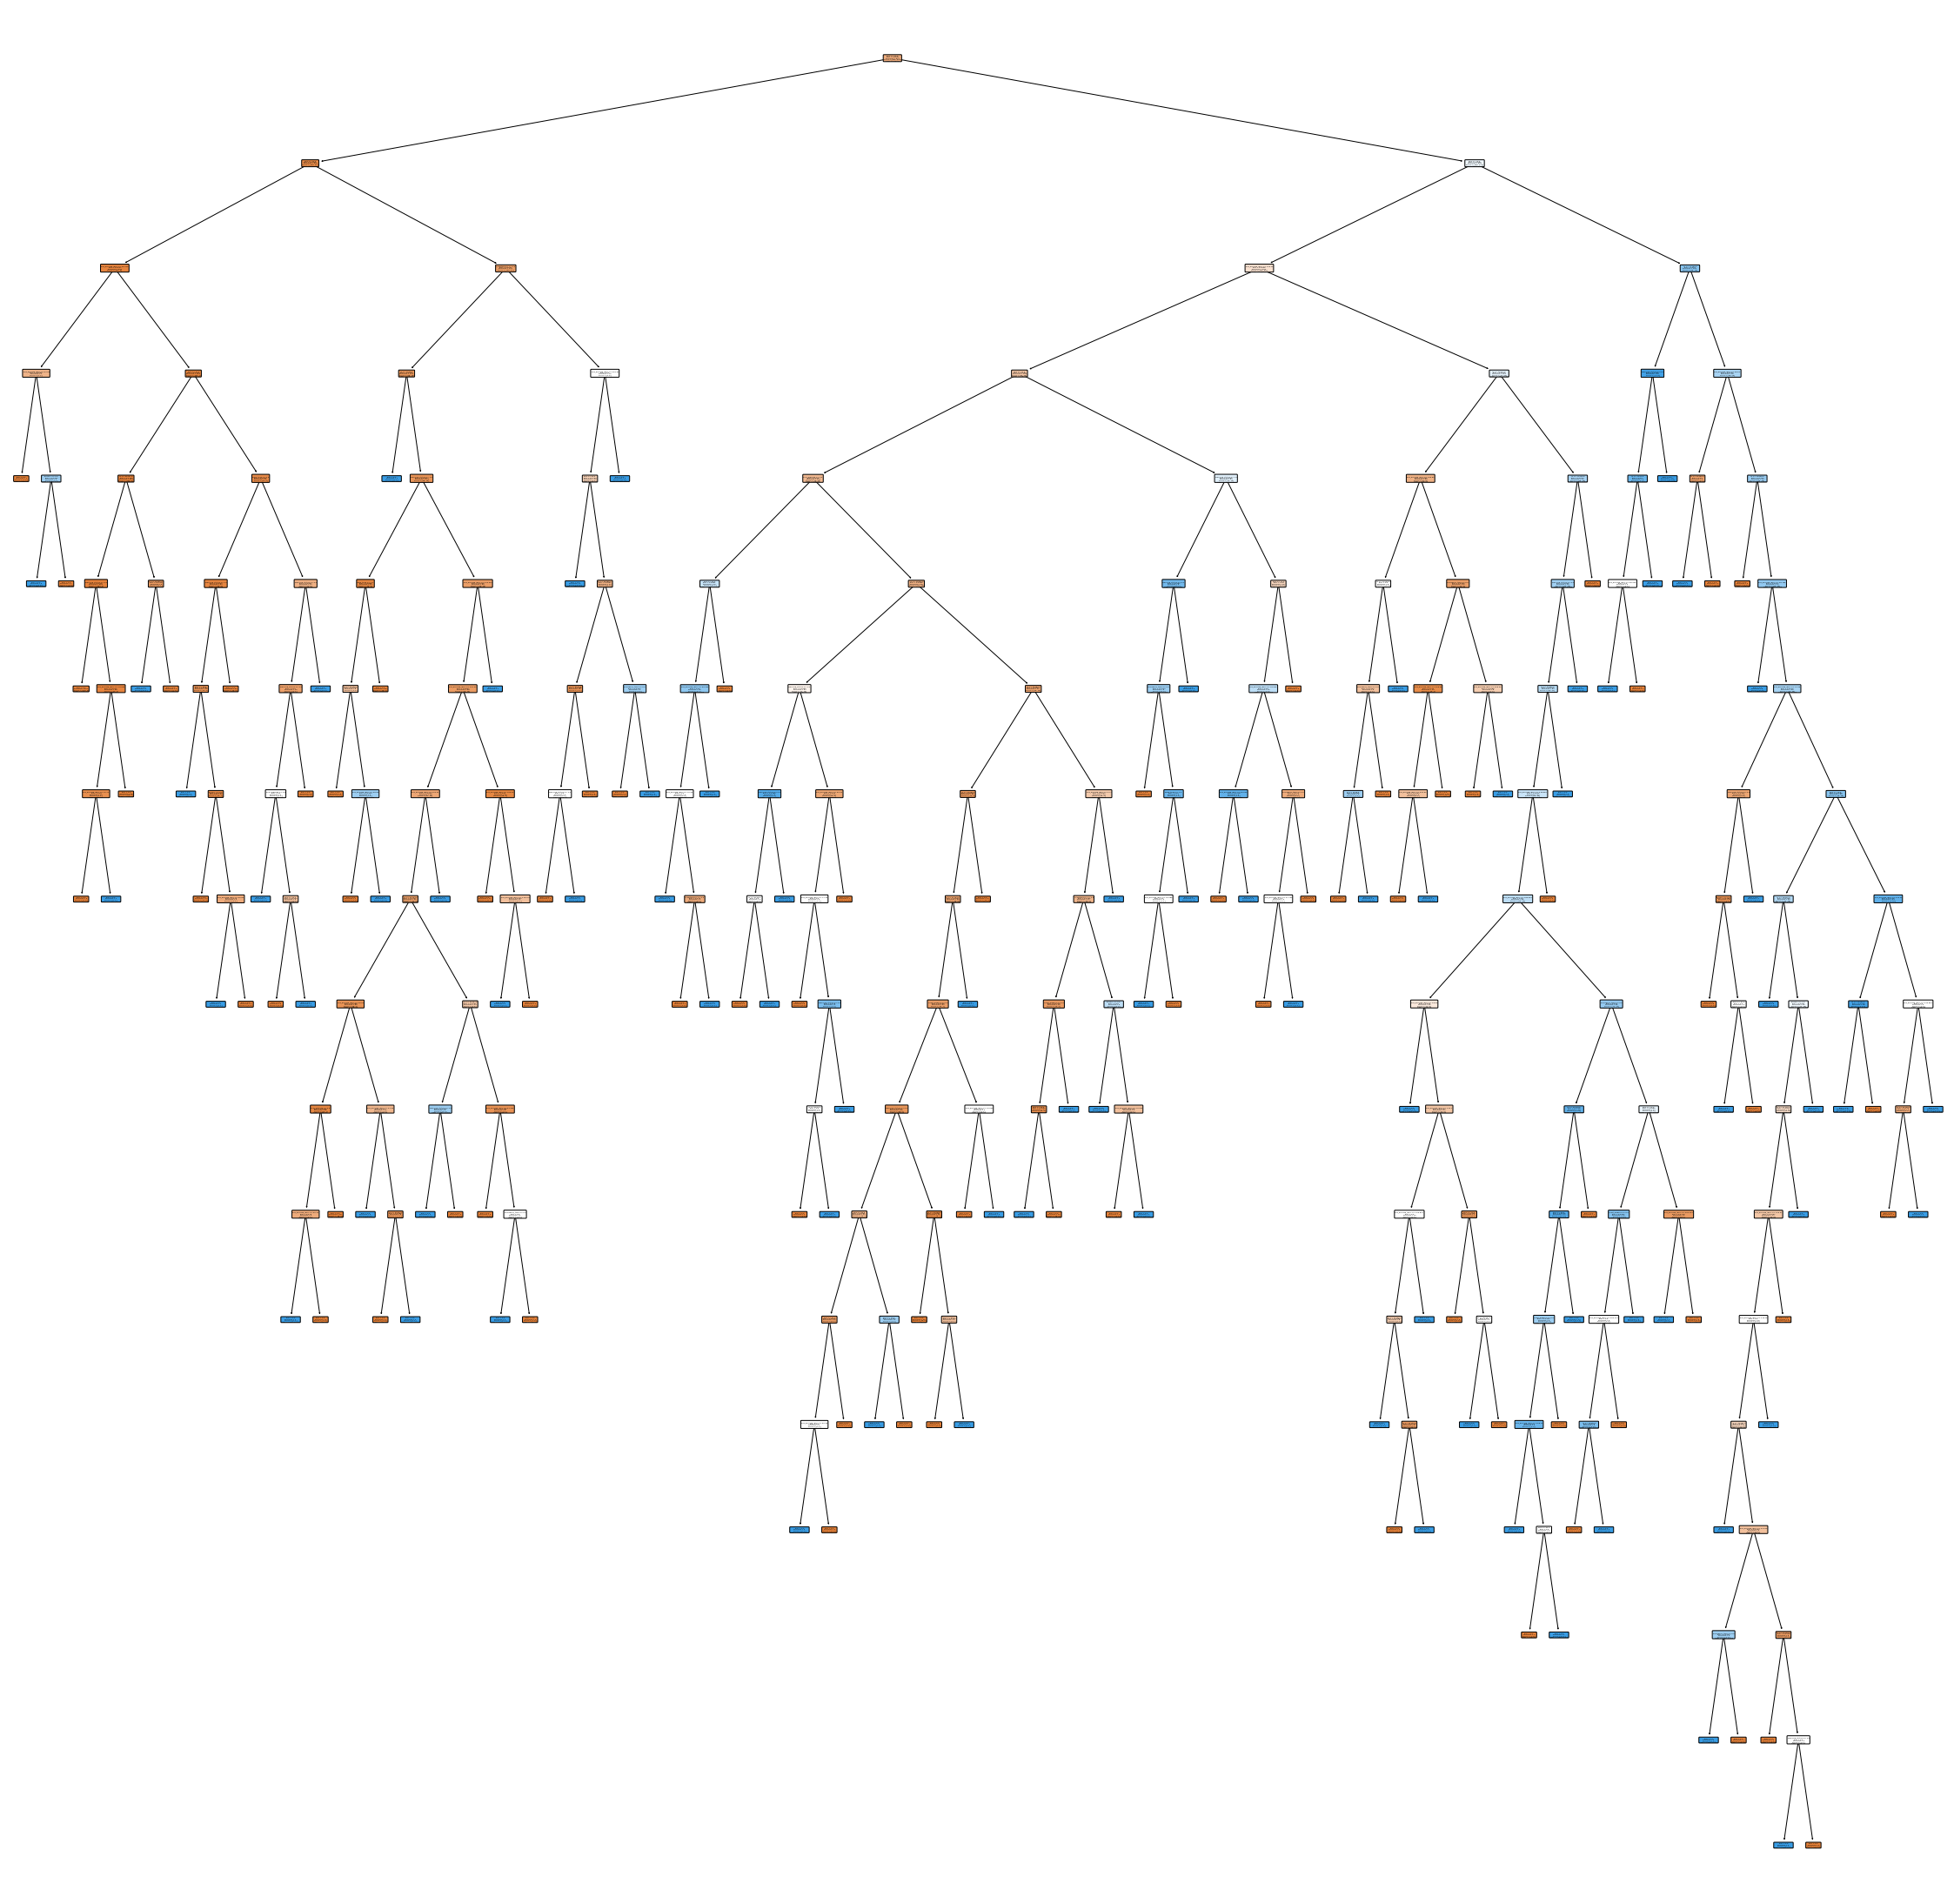

In [112]:
plt.figure(figsize = (40,40))
dec_tree = plot_tree(decision_tree=dtree, feature_names = ha1.columns, 
                     class_names =['healthy','heart attack'] , filled = True , 
                      precision = 4, rounded = True)